# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    ...
    1. Tokenized tweet
    ...

    2. Input tweet
    ...
    2. Tokenized tweet
    ...

In [1]:
# To download the dataset, please run the following command:
!bash download.sh

--2024-02-25 00:17:56--  https://docs.google.com/uc?export=download&id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving docs.google.com (docs.google.com)... 142.250.179.174, 2a00:1450:400e:80f::200e
Connecting to docs.google.com (docs.google.com)|142.250.179.174|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw&export=download [following]
--2024-02-25 00:17:56--  https://drive.usercontent.google.com/download?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.36.33, 2a00:1450:400e:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.36.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15647 (15K) [application/octet-stream]
Saving to: ‘data/english_tweets.zip’

data/english_

In [2]:
from pathlib import Path

root = Path("data/english_tweets")

In [3]:
with open(root / "file2") as f:
    data = f.readlines()
    print(
        *[
            """```
{0}. Input tweet
{1}    
{0}. Tokenized tweet
TODO: {1}

```""".format(
                i + 1, text
            )
            for i, text in enumerate(data[:15])
        ],
        sep="\n"
    )

```
1. Input tweet
Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    
1. Tokenized tweet
TODO: Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com


```
```
2. Input tweet
Its american tradition bitch
    
2. Tokenized tweet
TODO: Its american tradition bitch


```
```
3. Input tweet
@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    
3. Tokenized tweet
TODO: @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones


```
```
4. Input tweet
" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    
4. Tokenized tweet
TODO: " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"


```
```
5. Input tweet
Samsung Mini S2 p

```
1. Input tweet
Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    
1. Tokenized tweet
Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com


```
```
2. Input tweet
Its american tradition bitch
    
2. Tokenized tweet
Its , american , tradition , bitch


```
```
3. Input tweet
@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    
3. Tokenized tweet
@ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , . , . , . , Then , louder , ones


```
```
4. Input tweet
" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    
4. Tokenized tweet
" , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , < , - , - , - , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "


```
```
5. Input tweet
Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    
5. Tokenized tweet
Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m


```
```
6. Input tweet
@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    
6. Tokenized tweet
@dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .


```
```
7. Input tweet
iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    
7. Tokenized tweet
iPhone , activation , delays , continue , , , Apple , offers , $ , 30 , http://twt.gs/l3Ki


```
```
8. Input tweet
RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    
8. Tokenized tweet
RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , ! , ! , !


```
```
9. Input tweet
RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    
9. Tokenized tweet
RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI


```
```
10. Input tweet
Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    
10. Tokenized tweet
Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)


```
```
11. Input tweet
Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    
11. Tokenized tweet
Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland


```
```
12. Input tweet
@mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    
12. Tokenized tweet
@mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both


```
```
13. Input tweet
Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    
13. Tokenized tweet
Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv


```
```
14. Input tweet
Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    
14. Tokenized tweet
Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )


```
```
15. Input tweet
Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    
15. Tokenized tweet
Ik , weet , niet , wie , er , achter , de , T , - , Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , . , . , . , Best , vreemd , eigenlijk


```


## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [4]:
from collections import defaultdict


class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size

    def train(self, corpus: list[str]) -> None:
        """
        Trains the tokenizer on the given corpus.

        Args:
        - corpus: a list of strings, where each string represents a document
        """

        # all text concatenated
        concat_text = " ".join([el.strip() for el in corpus])

        # each word as a list of characters
        separated = [list((word)) for word in concat_text.split()]

        # flatten the list of lists to get all the characters
        flat_ids = [item for sublist in separated for item in sublist]
        self.vocab = set(flat_ids)

        # while the vocab size is less than the desired size
        while len(self.vocab) < self.vocab_size:
            # calculate the frequency of each pair of characters
            pairs = defaultdict(lambda: 0)
            for word in separated:
                for i in range(len(word) - 1):
                    pairs[(word[i] + word[i + 1])] += 1

            # get the most frequent pair
            best_pair = max(pairs, key=pairs.get)
            self.vocab.add(best_pair)

            # replace the pair with a single character
            for word in separated:
                i = 0
                while i < len(word) - 1:
                    if word[i] + word[i + 1] == best_pair:
                        word[i] = best_pair
                        word.pop(i + 1)
                    i += 1

    def tokenize(self, text: str) -> list[str]:
        """
        Tokenizes the given text.

        Args:
        - text: a string
        """

        tokenized = []
        for word in text.split():
            # greedy algorithm to find the longest token
            while word:
                best_match = ""
                for token in self.vocab:
                    if word.startswith(token) and len(token) > len(best_match):
                        best_match = token

                tokenized.append(best_match)
                word = word[len(best_match) :]

        return tokenized

In [5]:
eng_data = []
for i in range(5):
    with open(root / f"file{i + 1}") as f:
        eng_data.extend(f.readlines())

t = BPETokenizer(400)
t.train(eng_data)

In [6]:
print(t.tokenize("What is the strongest muscle in the humans body"))

['W', 'ha', 't', 'is', 'the', 'st', 'ro', 'ng', 'es', 't', 'm', 'us', 'c', 'le', 'in', 'the', 'h', 'u', 'man', 's', 'b', 'od', 'y']


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [7]:
def vocab_vs_number_of_tokens(
    data: list[str],
    vocab_sizes: list[int] = [0, 250, 500, 750, 1000],
):
    lengths = []
    for vocab_size in vocab_sizes:
        t = BPETokenizer(vocab_size)
        t.train(data)

        average_length = sum(len(t.tokenize(text)) for text in data) / len(data)
        lengths.append(average_length)

    return vocab_sizes, lengths

In [8]:
vocab_sizes, eng_lengths = vocab_vs_number_of_tokens(eng_data)

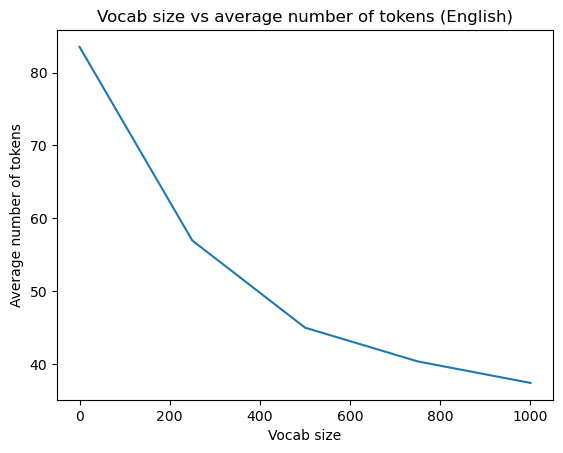

In [9]:
import matplotlib.pyplot as plt

plt.plot(vocab_sizes, eng_lengths)
plt.xlabel("Vocab size")
plt.ylabel("Average number of tokens")
plt.title("Vocab size vs average number of tokens (English)")
plt.show()

> Tell what `vocab_size` is preferrable and why.

I think that the preferable `vocab_size` is somewhat like 250, this is very similar to elbow method in clustering. We don't want too much tokens, since they will be too specific and we don't want too little tokens, since they will be too general. So, we need to find the sweet spot in between.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [10]:
import pandas as pd

ger_data = pd.read_csv("data/german_tweets.csv")["comment_text"].tolist()
ger_data[:5]

['boykottieren h rt sich besser an blue heart blue heart ',
 'rt es wird spekuliert ob merkel ein amt in br ssel bernimmt re es so wie sch tzen sie dann die zukunft der mitgliedstaaten ',
 'hat hitler wirklich den krieg in der ste verloren nach der welt schlagzeile hat die tagesschau nicht reagiert ',
 'rt may tritt in uk unter tr nen zur ck wenn merkel zur cktritt dann auch unter tr nen unter den freudentr nen von ',
 'eher nicht das g nse hauen wieder ab in ihre warmen berwinterungsquartiere grinning with sweat tears of joy ']

In [11]:
vocab_sizes, ger_lengths = vocab_vs_number_of_tokens(ger_data)

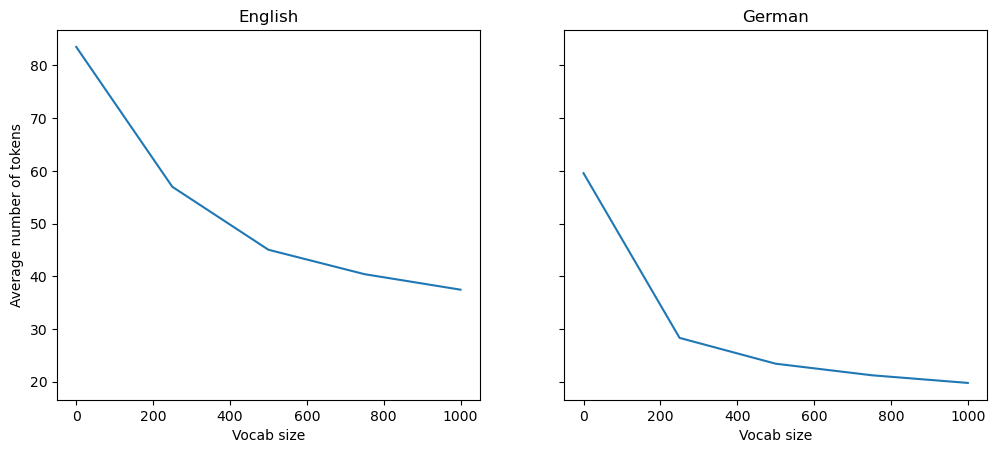

In [12]:
fig, axs = plt.subplots(1, 2, sharey=True)

fig.set_figwidth(12)

axs[0].plot(vocab_sizes, eng_lengths)
axs[1].plot(vocab_sizes, ger_lengths)
axs[0].set_title("English")
axs[1].set_title("German")

axs[0].set_ylabel("Average number of tokens")
axs[0].set_xlabel("Vocab size")
axs[1].set_xlabel("Vocab size")
plt.show()

> Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

Average length of the tokenized german tweets is smaller than the average length of the tokenized english tweets. This is because the german language has a lot of compound words, which are tokenized into smaller parts. This is not the case with english language, where compound words are not that common.